# Road Trip Data

In [2]:
import numpy as np
import pandas as pd

# Vehicle #1
pontiac = pd.read_csv('2004 Pontiac Vibe.csv', sep=',', skiprows=6, 
                      parse_dates=['Date'], index_col='Date')
pontiac = pontiac.iloc[0:172, :]
pontiac['Model'] = 'Pontiac'

# Vehicle #2
civic = pd.read_csv('1998 Honda Civic EX.csv', sep=',', skiprows=6, 
                      parse_dates=['Date'], index_col='Date')
civic = civic.iloc[0:19, :]
civic['Model'] = 'Civic'

# Vehicle #3
crv = pd.read_csv('Honda CR-V.csv', sep=',', skiprows=6, 
                      parse_dates=['Date'], index_col='Date')
crv = crv.iloc[:326, :]
crv['Model'] = 'CR-V'

# Concatenate
df = pd.concat([pontiac, civic, crv], axis=0)

# Covert to datetime index
df.index = pd.to_datetime(df.index)

df = df.sort_values(by='Date', ascending=True)

## 1. Cleaning

In [3]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2011-02-22 00:00:00 to 2019-06-07 21:20:00
Data columns (total 26 columns):
Odometer (mi)             517 non-null object
Trip Distance             512 non-null object
Fill Amount               517 non-null object
Fill Units                517 non-null object
Price per Unit            515 non-null object
Total Price               515 non-null object
Partial Fill              75 non-null object
MPG                       514 non-null object
Note                      2 non-null object
Octane                    0 non-null object
Location                  20 non-null object
Payment                   0 non-null object
Conditions                0 non-null object
Reset                     3 non-null object
Categories                0 non-null object
Flags                     517 non-null object
Currency Code             0 non-null object
Currency Rate             517 non-null object
Latitude                  325 non-null object


### 1.1 Drop unnecessary columns

In [4]:
# Drop column that are all nulls
df.dropna(how='all', axis=1, inplace=True)

# Drop unnecessary columns
df.drop(columns=['Reset', 'Currency Rate', 'ID', 'Fill Units', 'Flags', 'Note', 'Location'], inplace=True)

### 1.2 Feature Names

In [5]:
print(list(df.columns))

['Odometer (mi)', 'Trip Distance', 'Fill Amount', 'Price per Unit', 'Total Price', 'Partial Fill', 'MPG', 'Latitude', 'Longitude', 'Model']


In [6]:
# Remove whitespaces
df.columns = df.columns.str.replace(' ', '_')

# Rename Odometer column
df['Odometer'] = df['Odometer_(mi)']

df.drop(columns='Odometer_(mi)', inplace=True)

print(list(df.columns))

['Trip_Distance', 'Fill_Amount', 'Price_per_Unit', 'Total_Price', 'Partial_Fill', 'MPG', 'Latitude', 'Longitude', 'Model', 'Odometer']


### 1.3 Data types

In [7]:
df.dtypes

Trip_Distance      object
Fill_Amount        object
Price_per_Unit     object
Total_Price        object
Partial_Fill       object
MPG                object
Latitude           object
Longitude         float64
Model              object
Odometer           object
dtype: object

In [8]:
# Convert dtypes to numeric
df[['Trip_Distance', 'Fill_Amount', 'Price_per_Unit', 'Total_Price', 'MPG', 'Latitude', 'Longitude', 'Odometer']] = df[['Trip_Distance', 'Fill_Amount', 'Price_per_Unit', 'Total_Price', 'MPG', 'Latitude', 'Longitude', 'Odometer']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2011-02-22 00:00:00 to 2019-06-07 21:20:00
Data columns (total 10 columns):
Trip_Distance     512 non-null float64
Fill_Amount       517 non-null float64
Price_per_Unit    515 non-null float64
Total_Price       515 non-null float64
Partial_Fill      75 non-null object
MPG               514 non-null float64
Latitude          325 non-null float64
Longitude         325 non-null float64
Model             517 non-null object
Odometer          517 non-null float64
dtypes: float64(8), object(2)
memory usage: 44.4+ KB


### 1.4 Missing values

In [9]:
# Count null values
df.isnull().sum()

Trip_Distance       5
Fill_Amount         0
Price_per_Unit      2
Total_Price         2
Partial_Fill      442
MPG                 3
Latitude          192
Longitude         192
Model               0
Odometer            0
dtype: int64

#### 1.4.1 Missing Values: Trip_Distance

In [10]:
# View the rows for which Trip_Distance is null
df[df.Trip_Distance.isnull() == True]

,Trip_Distance,Fill_Amount,Price_per_Unit,Total_Price,Partial_Fill,MPG,Latitude,Longitude,Model,Odometer
Date,,,,,,,,,,
2011-02-22 00:00:00,NaN,11.354,3.8788,44.04,NaN,NaN,NaN,NaN,CR-V,199220.0
2015-05-26 21:54:00,NaN,10.214,3.0990,31.65,NaN,23.5795,NaN,NaN,CR-V,256340.0
2017-02-23 12:52:00,NaN,9.995,3.0590,30.57,NaN,NaN,34.026198,-117.689691,Civic,148600.0
2017-06-14 14:20:00,NaN,10.779,3.0990,33.40,NaN,NaN,33.328845,-117.162281,Pontiac,188781.0
2019-05-24 23:27:00,NaN,10.499,3.8390,40.31,NaN,25.5796,34.204654,-118.223648,Pontiac,230588.0


In [11]:
# Fix second observation
df['2015-05-26'] = df['2015-05-26'].ffill()

# Fix third and fourth observations
df['2017-02-23']['Trip_Distance'] = df['2017-02-23']['Trip_Distance'].fillna(0)
df['2017-06-14']['Trip_Distance'] = df['2017-06-14']['Trip_Distance'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# Some nulls can be filled with zero
df['Partial_Fill'] = df['Partial_Fill'].fillna(0)

# Remap Partial Fill column values to 1 and 0
df['Partial_Fill'].replace('Partial', 1, inplace=True)
df['Partial_Fill'] = df['Partial_Fill'].astype(int)
print(df['Partial_Fill'].value_counts())

# Other nulls are filled with average
df['MPG'].fillna(df['MPG'].mean(), inplace=True)
df['Trip_Distance'].fillna(df['Trip_Distance'].mean(), inplace=True)

df.head()

0    441
1     76
Name: Partial_Fill, dtype: int64


,Trip_Distance,Fill_Amount,Price_per_Unit,Total_Price,Partial_Fill,MPG,Latitude,Longitude,Model,Odometer
Date,,,,,,,,,,
2011-02-22 00:00:00,261.786408,11.3540,3.8788,44.04,0,24.692765,NaN,NaN,CR-V,199220.0
2011-04-03 00:00:00,234.000000,12.9022,4.4690,57.66,0,18.136400,NaN,NaN,CR-V,199454.0
2011-04-19 00:00:00,219.000000,12.5520,4.6990,58.98,0,17.447400,NaN,NaN,CR-V,199673.0
2011-05-03 00:00:00,276.000000,12.2310,4.7790,58.45,0,22.565600,NaN,NaN,CR-V,199949.0
2011-06-14 19:02:00,247.000000,13.2280,4.8790,64.54,0,18.672500,NaN,NaN,CR-V,200196.0


In [13]:
# Last confirm no more nulls
df.isnull().sum()

Trip_Distance       0
Fill_Amount         0
Price_per_Unit      2
Total_Price         2
Partial_Fill        0
MPG                 0
Latitude          191
Longitude         191
Model               0
Odometer            0
dtype: int64

## 2. Exploratory Data Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_palette("coolwarm")

#### Questions:
* How does driving vary by time of year? (Trip_Distance and Date)
* Is it actually cheaper to not fill the tank all the way? group by for Partial_Fill, compare mean Total_Price
* Do longer trips have better gas mileage? (Trip_Distance and MPG)
* How has the price of gas varied over time? (Price_per_Unit and Date
* How has the price of gas varied by location? (Price_per_Unit and Lat/Long)
* Is gas mileage getting better or worse over time? (Monthly MPG and Date)
* Correlation between gas mileage and oil service 
* What clusters are present in the data? T-SNE
* Is price higher certain times of year? (heatmap of Price_per_Unit as hue vs Date (year vs month))
* Is gas mileage better at certain times of year?(heatmap of MPG as hue vs Date (year vs month))
* What is the best overall strategy for saving money? For maximizing MPG?
* What is the relationship between Price_per_Unit and Total_Price? looks at my behavior, include MPG as heatmap
* Make various heatmaps of MPG and different variables: Trip_Distance and Fill_Amount
* Do I actually save money with incomplete fills?
* What are my spending habits, are there monthly patterns? heatmap: Total_Price as hue, Date as x/y
* MPG by weather conditions (need weather for location and date!)
* Cost savings of different vehicles

### 2.1 Tidy Data

The data contains no missing values, columns are properly named, data types are appropriate and the Datetime index is properly set.

In [15]:
df.head()

,Trip_Distance,Fill_Amount,Price_per_Unit,Total_Price,Partial_Fill,MPG,Latitude,Longitude,Model,Odometer
Date,,,,,,,,,,
2011-02-22 00:00:00,261.786408,11.3540,3.8788,44.04,0,24.692765,NaN,NaN,CR-V,199220.0
2011-04-03 00:00:00,234.000000,12.9022,4.4690,57.66,0,18.136400,NaN,NaN,CR-V,199454.0
2011-04-19 00:00:00,219.000000,12.5520,4.6990,58.98,0,17.447400,NaN,NaN,CR-V,199673.0
2011-05-03 00:00:00,276.000000,12.2310,4.7790,58.45,0,22.565600,NaN,NaN,CR-V,199949.0
2011-06-14 19:02:00,247.000000,13.2280,4.8790,64.54,0,18.672500,NaN,NaN,CR-V,200196.0


In [16]:
df.shape

(517, 10)

In [17]:
df.drop(['Latitude', 'Longitude', 'Odometer'], axis=1).describe()

,Trip_Distance,Fill_Amount,Price_per_Unit,Total_Price,Partial_Fill,MPG
count,517.000000,517.000000,515.000000,515.000000,517.000000,517.000000
mean,261.786408,10.673056,3.531219,37.665573,0.147002,24.692765
std,72.200712,2.504046,0.652747,10.866974,0.354451,4.228630
min,0.000000,1.350000,2.359000,3.860000,0.000000,13.574000
25%,242.000000,10.280000,3.059000,31.450000,0.000000,22.493600
50%,277.000000,11.367000,3.539000,37.320000,0.000000,24.543700
75%,301.000000,12.313000,3.899000,44.625000,0.000000,26.798800
max,821.000000,14.240000,11.696000,67.610000,1.000000,62.830000


### 2.2 Feature EDA

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


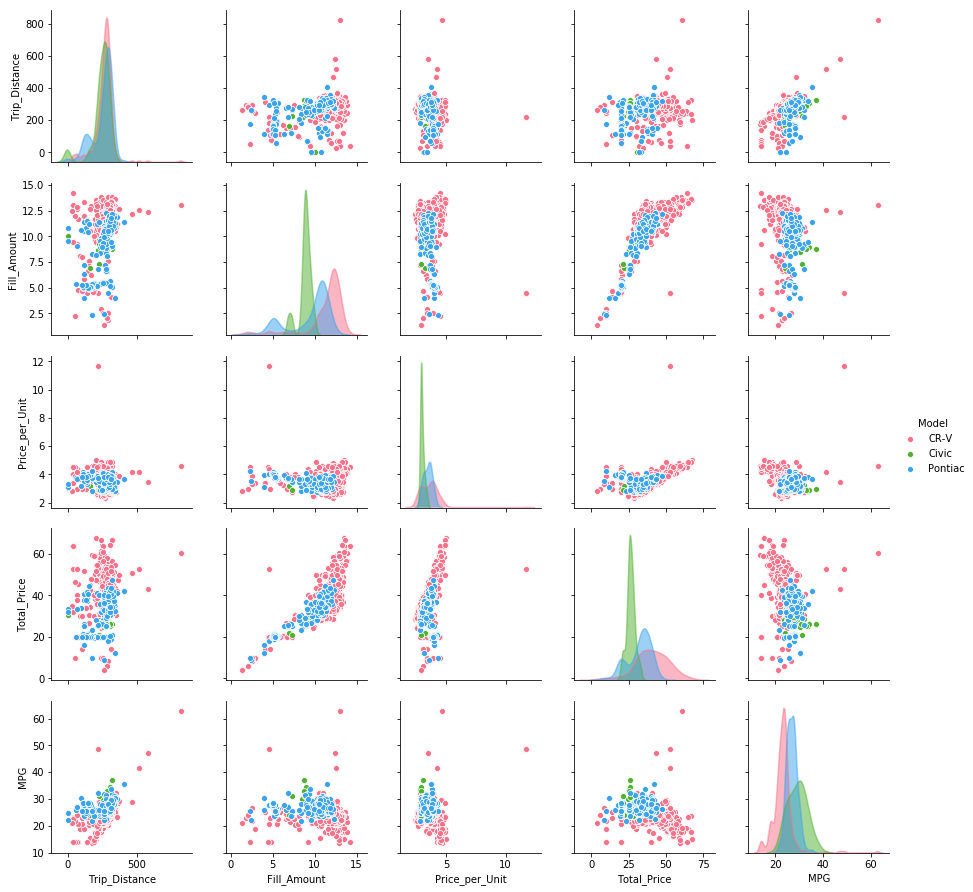

In [18]:
sns.pairplot(df, vars=['Trip_Distance', 'Fill_Amount', "Price_per_Unit", "Total_Price", 'MPG'], 
             kind='scatter', palette='husl', hue='Model', diag_kws={'alpha':0.5}, diag_kind="kde")
plt.show()

Some of the values for the Civic were probably entered incorrectly, or are two observations that have been combined.

#### 2.2.1 Feature: Trip_Distance

In [19]:
df['Trip_Distance'].describe()

count    517.000000
mean     261.786408
std       72.200712
min        0.000000
25%      242.000000
50%      277.000000
75%      301.000000
max      821.000000
Name: Trip_Distance, dtype: float64

Creating an ECDF plotting function:

In [20]:
# ECDF function
def ecdf(data, column, title=None, color=None):
    
    # Number of data points
    n = len(data[column])
    
    # x-data for the ECDF: x
    x = np.sort(data[column])
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(x, y, marker='.', linestyle='none', color=color)
    plt.title(title)
    plt.xlabel("{}".format(column))
    plt.ylabel("ECDF")

ECDF plots of each vehicle:

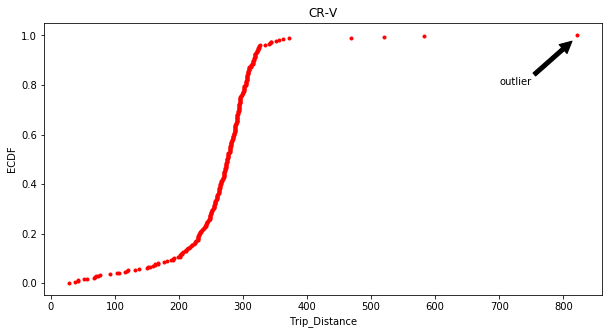

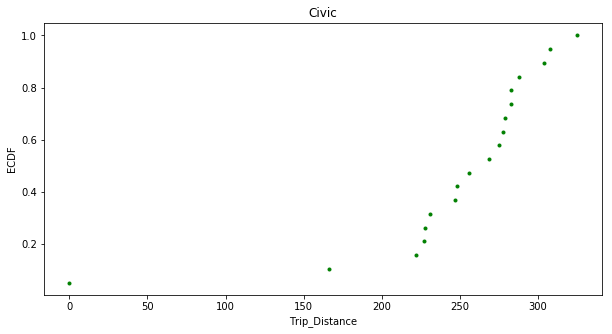

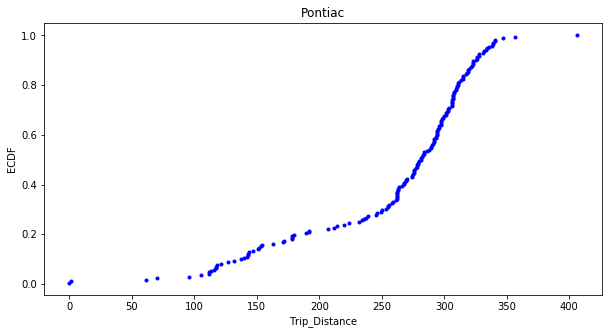

In [21]:
col = 'Trip_Distance'

ax = ecdf(df[df.Model == 'CR-V'], col, 'CR-V', 'r')

plt.annotate('outlier', xy=(815, 0.98), xytext=(700, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.02))

ax = ecdf(df[df.Model == 'Civic'], col, 'Civic', 'g')
ax = ecdf(df[df.Model == 'Pontiac'], col, 'Pontiac', 'b')
plt.show()

#### 2.2.2 Feature: Fill_Amount

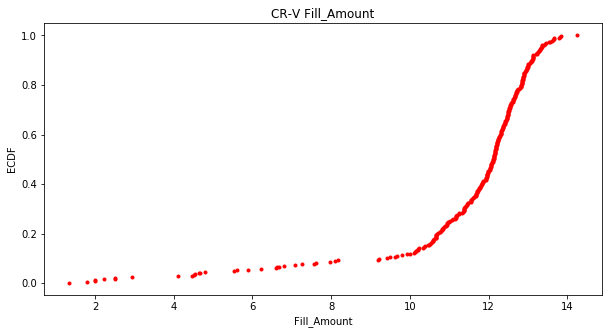

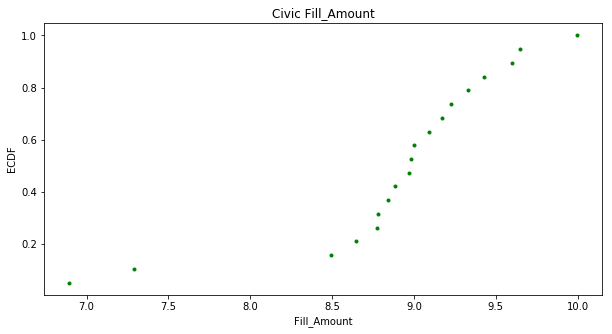

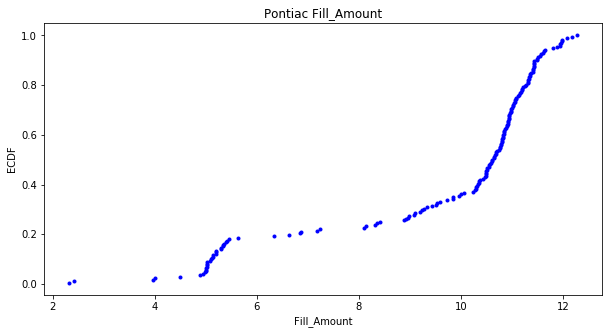

In [22]:
# Fill amount in gallons
col = 'Fill_Amount'
ecdf(df[df.Model == 'CR-V'], col, 'CR-V {}'.format(col), 'r')
ecdf(df[df.Model == 'Civic'], col, 'Civic {}'.format(col), 'g')
ecdf(df[df.Model == 'Pontiac'], col, 'Pontiac {}'.format(col), 'b')


#### 2.2.3 Feature: Price_per_Unit

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


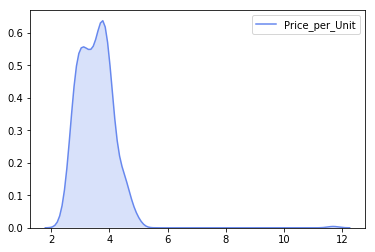

In [23]:
sns.kdeplot(data=df.Price_per_Unit, shade=True)
plt.show()

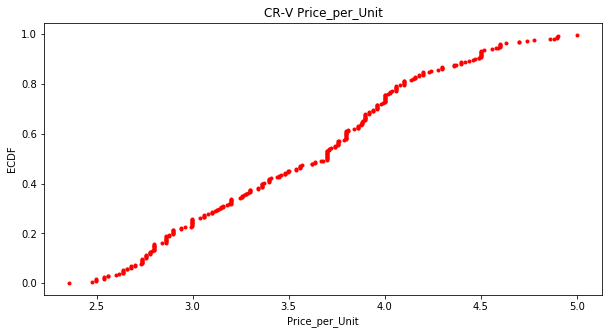

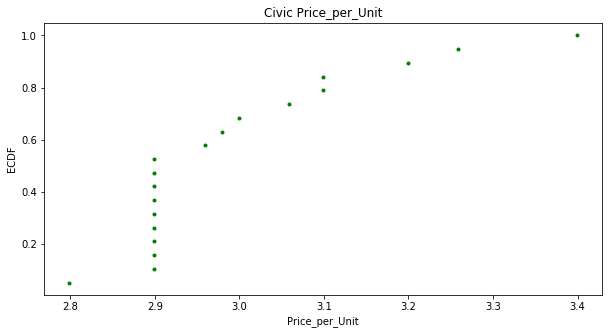

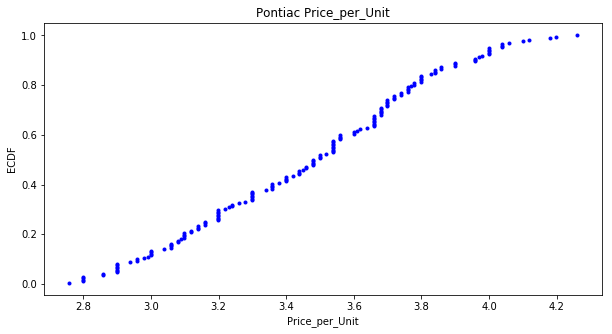

In [24]:
# Price per unit of fuel, ie., cost per gallon
col = 'Price_per_Unit'
df_drop_outlier = df[df.Price_per_Unit != df.Price_per_Unit.max()]
df_drop_outlier

# Create ECDF graphs
ecdf(df_drop_outlier[df_drop_outlier.Model == 'CR-V'], col, 'CR-V {}'.format(col), 'r')
ecdf(df[df.Model == 'Civic'], col, 'Civic {}'.format(col), 'g')
ecdf(df[df.Model == 'Pontiac'], col, 'Pontiac {}'.format(col), 'b')


#### Price_per_Unit over time

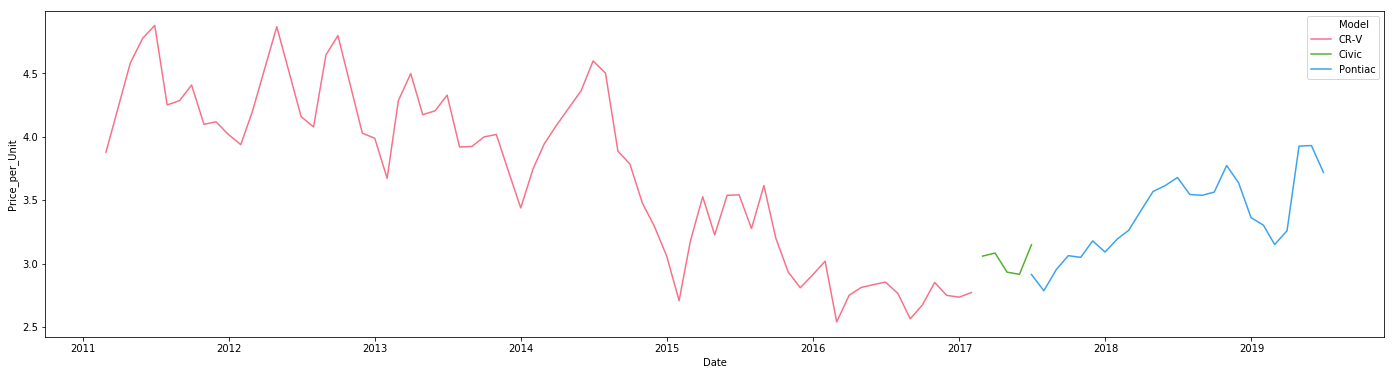

In [25]:
# Resample by month
df_crv = df[df.Model == 'CR-V'].resample('M').mean()
df_crv['Model'] = 'CR-V'

df_civic = df[df.Model == 'Civic'].resample('M').mean()
df_civic['Model'] = 'Civic'

df_pontiac = df[df.Model == 'Pontiac'].resample('M').mean()
df_pontiac['Model'] = 'Pontiac'

# Concatenate resampled dataframes
df_resample = pd.concat([df_crv, df_civic, df_pontiac], axis=0)

# Remove incorrect outlier value
df_resample = df_resample[df_resample.Price_per_Unit != df_resample.Price_per_Unit.max()]

# plot
plt.figure(figsize=(24, 6))
g = sns.lineplot(x='Date', y='Price_per_Unit', hue='Model', data=df_resample[df_resample.MPG < 40].reset_index(), palette='husl')
plt.show()


#### 2.2.4 Feature: Total_Price

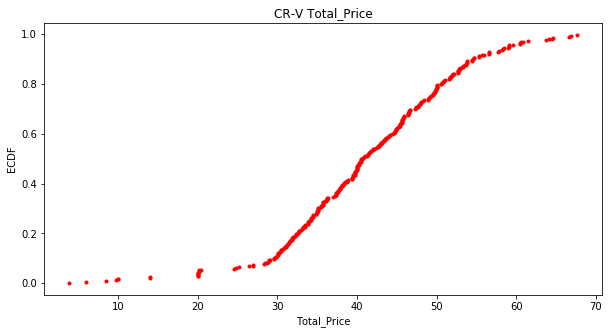

In [26]:
col = 'Total_Price'
ecdf(df[df.Model == 'CR-V'], 'Total_Price', 'CR-V {}'.format(col), 'r')

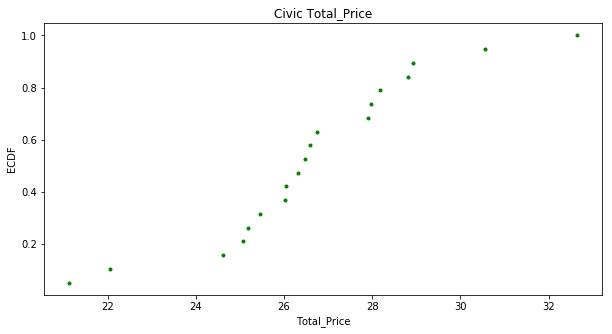

In [27]:
ecdf(df[df.Model == 'Civic'], 'Total_Price', 'Civic {}'.format(col), 'g')

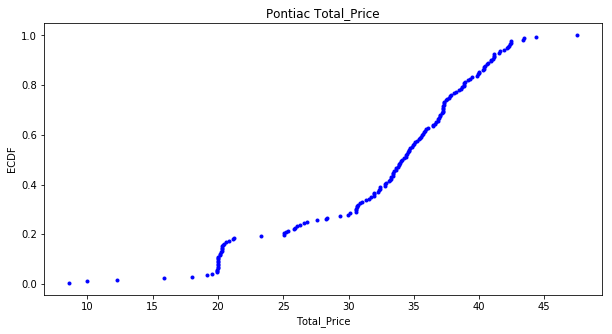

In [28]:
ecdf(df[df.Model == 'Pontiac'], 'Total_Price', 'Pontiac {}'.format(col), 'b')

#### Sum of Total_Price

Sum total of fuel costs

In [29]:
print("Total USD paid for fuel: {}".format(round(df.Total_Price.sum(), 2)))

tds = df.index[-1] - df.index[0]

cost_per_day = df.Total_Price.sum() / tds.days

print("Fuel cost per day: {}".format(round(cost_per_day, 2)))

Total USD paid for fuel: 19397.77
Fuel cost per day: 6.41


#### Total_Price over time

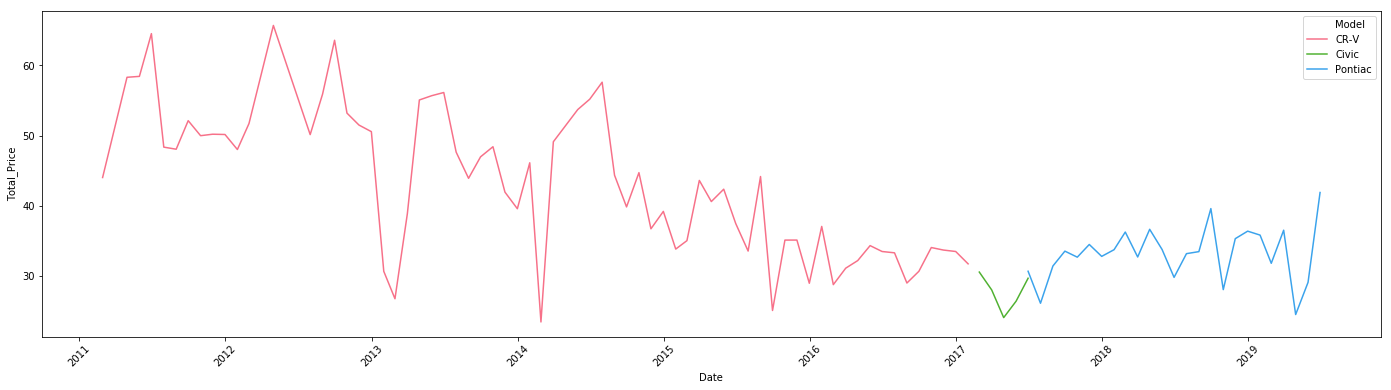

In [30]:
# Resample by month
df_crv = df[df.Model == 'CR-V'].resample('M').mean()
df_crv['Model'] = 'CR-V'

df_civic = df[df.Model == 'Civic'].resample('M').mean()
df_civic['Model'] = 'Civic'

df_pontiac = df[df.Model == 'Pontiac'].resample('M').mean()
df_pontiac['Model'] = 'Pontiac'

# Concatenate resampled dataframes
df_resample = pd.concat([df_crv, df_civic, df_pontiac], axis=0)

# Plot
plt.figure(figsize=(24, 6))
g = sns.lineplot(x='Date', y='Total_Price', hue='Model', data=df_resample[df_resample.MPG < 40].reset_index(), palette='husl')
plt.xticks(rotation=45)
plt.show()

#### Total_Price Seasonal analysis

Visualizing a heatmap indexed by time is a useful way to look for seasonal patterns in data. For this three heatmaps are created using a different approach each:
1. Raw vehicle data
2. Scaled per vehicle data
3. Scaled vehicle data with a rolling monthly average

Raw, unscaled vehicle data:

In [31]:
# Filter for full tanks only; Create Month & Year columns 
df_full = df[df.Partial_Fill == 0]
df_full['Year'] = df_full.index.year
df_full['Month'] = df_full.index.month

# Mask to remove outliers
mask = (df_full.MPG < 40) & (df.Trip_Distance < 400)

# Update dataframe
df_full = df_full[mask]

# Create crosstab and plot
df_crosstab_unscaled = pd.crosstab(df_full['Year'], df_full['Month'], 
                                    values=df_full['Total_Price'], aggfunc='mean').sort_values(by='Year', ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Scaled per vehicle data:

In [32]:
# Subset by vehicle
crv = df_full[(df_full.Model == 'CR-V')]['Total_Price']
civic = df_full[(df_full.Model == 'Civic')]['Total_Price']
pontiac = df_full[(df_full.Model == 'Pontiac')]['Total_Price']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

crv_scaled = pd.DataFrame(scaler.fit_transform(crv.values.reshape(-1, 1)))
civic_scaled = pd.DataFrame(scaler.fit_transform(civic.values.reshape(-1, 1)))
pontiac_scaled = pd.DataFrame(scaler.fit_transform(pontiac.values.reshape(-1, 1)))

df_scaled = pd.concat([crv_scaled, civic_scaled, pontiac_scaled])

df_full['Total_Price_scaled'] = df_scaled.values

# Create crosstab and plot
df_crosstab_scaled = pd.crosstab(df_full['Year'], df_full['Month'], 
                                    values=df_full['Total_Price_scaled'], aggfunc='mean').sort_values(by='Year', ascending=False)


Scaled vehicle data with a rolling monthly average:

In [33]:
# Select Total_Price_scaled, year and month
df_full = df_full[['Year', 'Month', 'Total_Price_scaled']]

rolling_monthly_mean = pd.DataFrame(df_full['Total_Price_scaled'].rolling('90D').mean())
rolling_monthly_mean['Year'] = df_full.index.year
rolling_monthly_mean['Month'] = df_full.index.month

# Create crosstab and plot
df_crosstab_rolling = pd.crosstab(rolling_monthly_mean['Year'], rolling_monthly_mean['Month'], 
                                    values=rolling_monthly_mean['Total_Price_scaled'], aggfunc='mean').sort_values(by='Year', ascending=False)

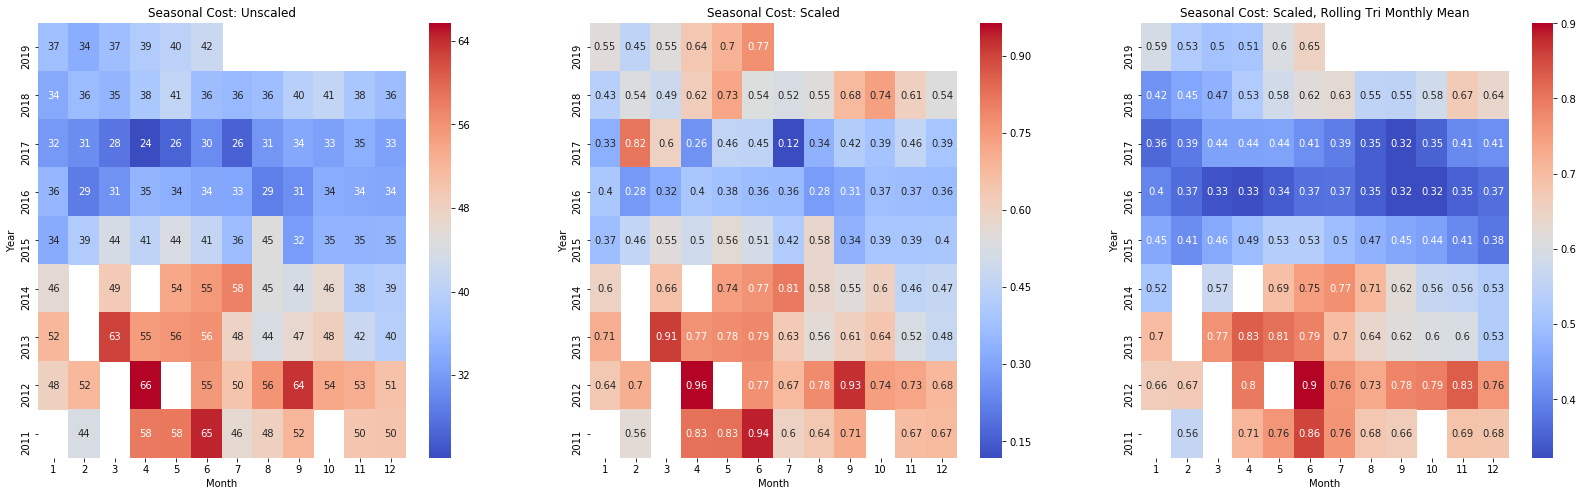

In [34]:
# Set palette
colormap = plt.cm.coolwarm

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(28,8))

ax1 = sns.heatmap(df_crosstab_unscaled, cmap=colormap, ax=ax1, annot=True)
ax1.set_title('Seasonal Cost: Unscaled')

ax2 = sns.heatmap(df_crosstab_scaled, cmap=colormap, ax=ax2, annot=True)
ax2.set_title('Seasonal Cost: Scaled')

ax3 = sns.heatmap(df_crosstab_rolling, cmap=colormap, ax=ax3, annot=True)
ax3.set_title('Seasonal Cost: Scaled, Rolling Tri Monthly Mean')
plt.show()

#### 2.2.5 Feature: Partial_Fill

14.7% of fillups are partial fills:

In [35]:
df['Partial_Fill'].value_counts(normalize=True).mul(100)

0    85.299807
1    14.700193
Name: Partial_Fill, dtype: float64

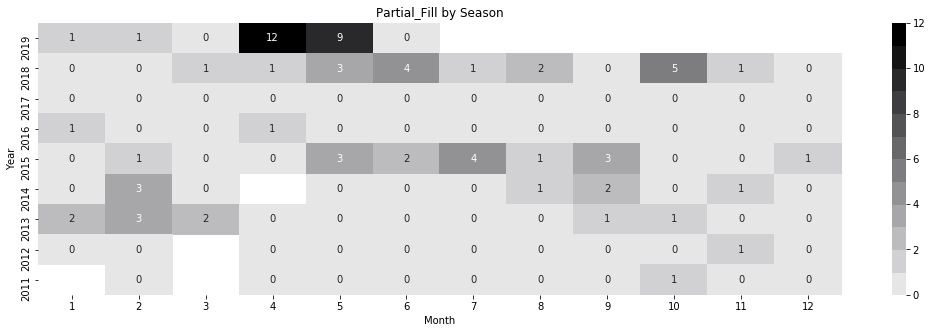

In [36]:
# Add Year and Month columns to dataset
df['Year'] = df.index.year
df['Month'] = df.index.month

df_crosstab_partial_fill = pd.crosstab(df['Year'], df['Month'], df['Partial_Fill'], aggfunc=sum)

df_crosstab_partial_fill = df_crosstab_partial_fill.sort_index(ascending=False)

colormap = sns.cubehelix_palette(12, hue=0.05, rot=0, light=0.9, dark=0)

fig, ax = plt.subplots(ncols=1, figsize=(18,5))

ax = sns.heatmap(df_crosstab_partial_fill, cmap=colormap, annot=True)
ax.set_title('Partial_Fill by Season')
plt.show()

#### 2.2.6 Feature: MPG

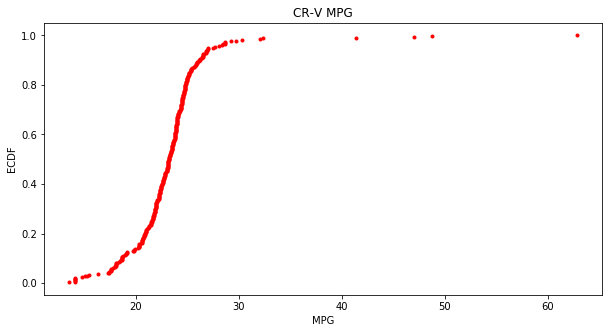

In [37]:
col = 'MPG'

ecdf(df[df.Model == 'CR-V'], 'MPG', 'CR-V {}'.format(col), 'r')

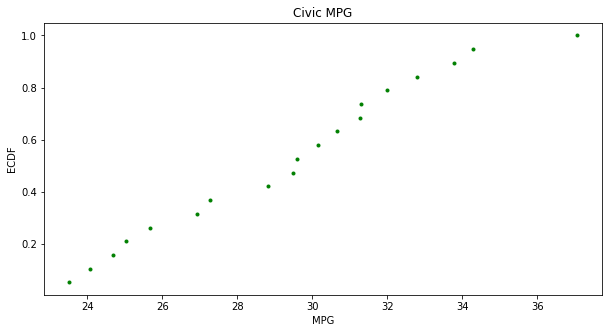

In [38]:
ecdf(df[df.Model == 'Civic'], 'MPG', 'Civic {}'.format(col), 'g')

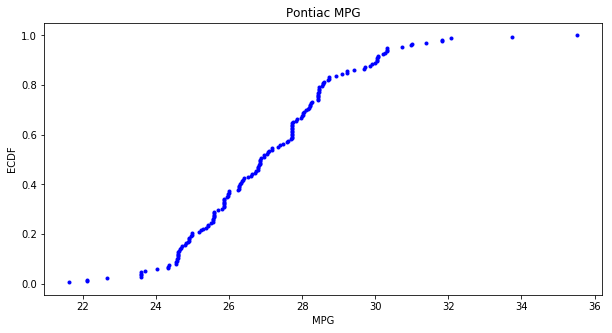

In [39]:
ecdf(df[df.Model == 'Pontiac'], 'MPG', 'Pontiac {}'.format(col), 'b')

#### MPG over time

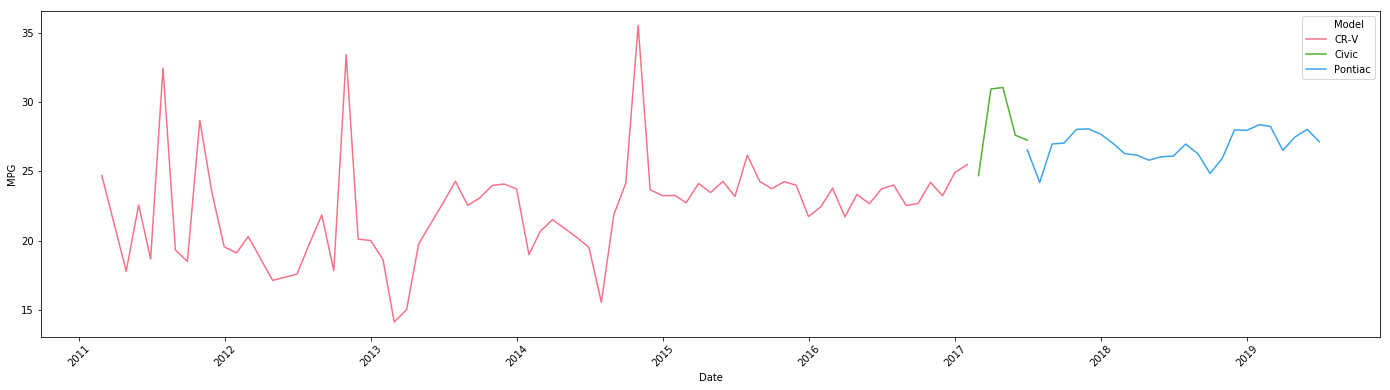

In [40]:
# Resample by month
df_crv = df[df.Model == 'CR-V'].resample('M').mean()
df_crv['Model'] = 'CR-V'

df_civic = df[df.Model == 'Civic'].resample('M').mean()
df_civic['Model'] = 'Civic'

df_pontiac = df[df.Model == 'Pontiac'].resample('M').mean()
df_pontiac['Model'] = 'Pontiac'

# Concatenate resampled dataframes
df_resample = pd.concat([df_crv, df_civic, df_pontiac], axis=0)

# plot
plt.figure(figsize=(24, 6))
g = sns.lineplot(x='Date', y='MPG', hue='Model', data=df_resample[df_resample.MPG < 40].reset_index(), palette='husl')
plt.xticks(rotation=45)
plt.show()

Coincidentally the line colors also correspond to the actual color of each vehicle.

#### Seasonality of MPG

Is there any variation of MPG by season?

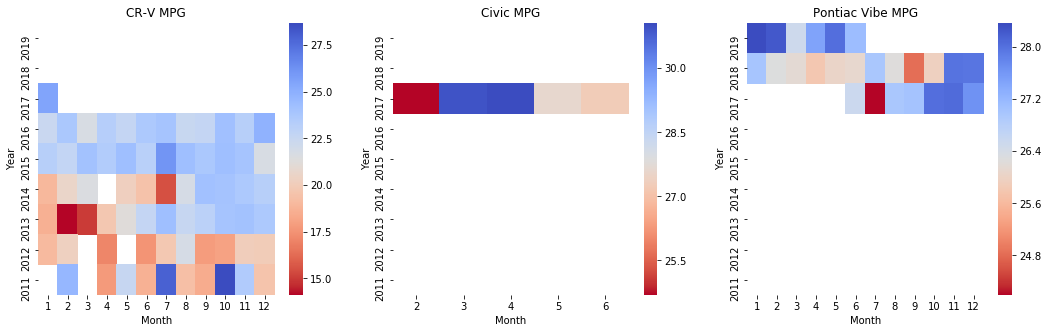

In [41]:
# Create crosstab and plot
df_crosstab_crv = pd.crosstab(df['Year'], df['Month'], 
                                    values=df[(df.MPG < 40) & (df.Model == 'CR-V')]['MPG'], aggfunc='mean').sort_values(by='Year', ascending=False)

df_crosstab_civic = pd.crosstab(df['Year'], df['Month'], 
                                    values=df[df.Model=='Civic']['MPG'], aggfunc='mean').sort_values(by='Year', ascending=False)

df_crosstab_pontiac = pd.crosstab(df['Year'], df['Month'], 
                                    values=df[df.Model=='Pontiac']['MPG'], aggfunc='mean').sort_values(by='Year', ascending=False)

# Reverse color palette
colormap = plt.cm.coolwarm_r

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))
ax1 = sns.heatmap(df_crosstab_crv, cmap=colormap, ax=ax1)
ax2 = sns.heatmap(df_crosstab_civic, cmap=colormap, ax=ax2)
ax3 = sns.heatmap(df_crosstab_pontiac, cmap=colormap, ax=ax3)
ax1.set_title('CR-V MPG')
ax2.set_title('Civic MPG')
ax3.set_title('Pontiac Vibe MPG')
plt.show()

Percent change of MPG by season

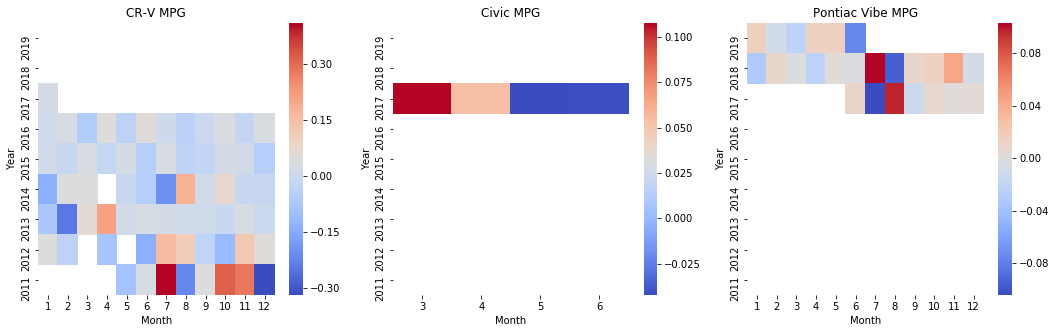

In [42]:
# Create crosstab and plot
df_crosstab_crv = pd.crosstab(df['Year'], df['Month'], 
                                    values=df[(df.MPG < 40) & (df.Model == 'CR-V')]['MPG'].pct_change(periods=3), 
                              aggfunc='mean').sort_values(by='Year', ascending=False)

df_crosstab_civic = pd.crosstab(df['Year'], df['Month'], 
                                    values=df[df.Model=='Civic']['MPG'].pct_change(periods=3), 
                                aggfunc='mean').sort_values(by='Year', ascending=False)

df_crosstab_pontiac = pd.crosstab(df['Year'], df['Month'], 
                                    values=df[df.Model=='Pontiac']['MPG'].pct_change(periods=3), 
                                  aggfunc='mean').sort_values(by='Year', ascending=False)

# Reverse color palette
colormap = plt.cm.coolwarm

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))
ax1 = sns.heatmap(df_crosstab_crv, cmap=colormap, ax=ax1)
ax2 = sns.heatmap(df_crosstab_civic, cmap=colormap, ax=ax2)
ax3 = sns.heatmap(df_crosstab_pontiac, cmap=colormap, ax=ax3)
ax1.set_title('CR-V MPG')
ax2.set_title('Civic MPG')
ax3.set_title('Pontiac Vibe MPG')
plt.show()

Percent Change of MPG across 3 vehicles, data is scaled by vehicle:

In [43]:
# Subset by vehicle
crv = df[(df.Model == 'CR-V')]['MPG']
civic = df[(df.Model == 'Civic')]['MPG']
pontiac = df[(df.Model == 'Pontiac')]['MPG']

scaler = MinMaxScaler(feature_range=(0, 1))

crv_scaled = pd.DataFrame(scaler.fit_transform(crv.values.reshape(-1, 1)))
civic_scaled = pd.DataFrame(scaler.fit_transform(civic.values.reshape(-1, 1)))
pontiac_scaled = pd.DataFrame(scaler.fit_transform(pontiac.values.reshape(-1, 1)))

df_scaled = pd.concat([crv_scaled, civic_scaled, pontiac_scaled])

df['MPG_scaled'] = df_scaled.values

# Create crosstab and plot
df_crosstab_scaled = pd.crosstab(df['Year'], df['Month'], 
                                    values=df['MPG_scaled'], aggfunc='mean').sort_values(by='Year', ascending=False)


In [44]:
# Select Total_Price_scaled, year and month
df_rolling = df[['Year', 'Month', 'MPG_scaled']]

# Apply caluculation of rolling percentage change with 3 month period
rolling_monthly_mean = pd.DataFrame(df['MPG_scaled'].pct_change(periods=3))
rolling_monthly_mean['Year'] = df_rolling.index.year
rolling_monthly_mean['Month'] = df_rolling.index.month

# Create crosstab and plot
df_crosstab_rolling = pd.crosstab(rolling_monthly_mean['Year'], rolling_monthly_mean['Month'], 
                                    values=rolling_monthly_mean['MPG_scaled'], aggfunc='mean').sort_values(by='Year', ascending=False)


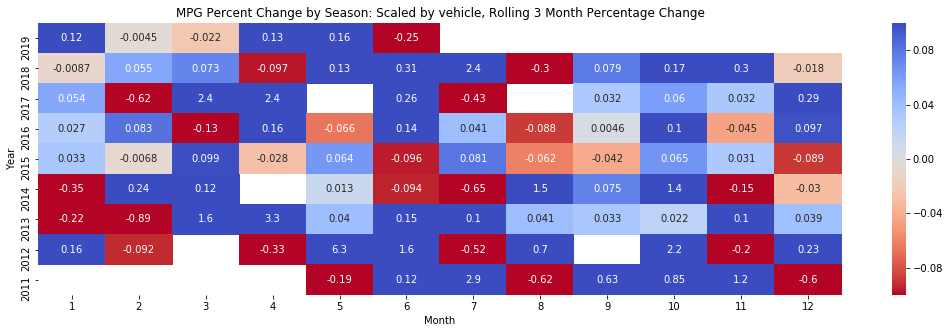

In [45]:

# Set palette
colormap = plt.cm.coolwarm_r

fig, ax = plt.subplots(ncols=1, figsize=(18,5))

ax1 = sns.heatmap(df_crosstab_rolling, cmap=colormap, ax=ax, annot=True)
ax1.set_title('MPG Percent Change by Season: Scaled by vehicle, Rolling 3 Month Percentage Change')

plt.show()

#### 2.2.7 Feature: Odometer

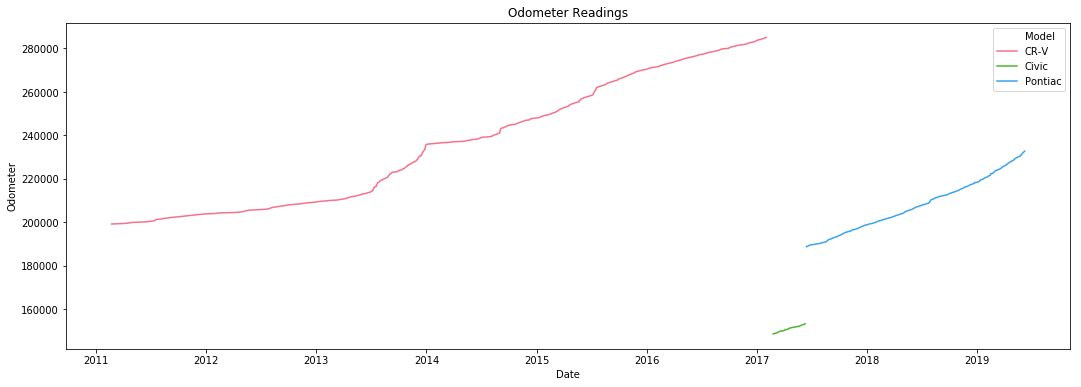

In [46]:
fig, ax = plt.subplots(ncols=1, figsize=(18, 6))
sns.lineplot(x='Date', y='Odometer', hue='Model', palette='husl', data=df.reset_index(), ax=ax)
ax.set_title('Odometer Readings')
plt.show()

Percentage change by month of Odometer

In [47]:
crv_pct_change = pd.DataFrame(df[df.Model == 'CR-V']['Odometer'].pct_change(periods=1))
crv_pct_change = crv_pct_change.resample('M').mean()
crv_pct_change['Model'] = 'CR-V'

civic_pct_change = pd.DataFrame(df[df.Model == 'Civic']['Odometer'].pct_change(periods=1))
civic_pct_change = civic_pct_change.resample('M').mean()
civic_pct_change['Model'] = 'Civic'

pontiac_pct_change = pd.DataFrame(df[df.Model == 'Pontiac']['Odometer'].pct_change(periods=1))
pontiac_pct_change = pontiac_pct_change.resample('M').mean()
pontiac_pct_change['Model'] = 'Pontiac'


df_pct_change = pd.concat([crv_pct_change, civic_pct_change, pontiac_pct_change]).dropna()

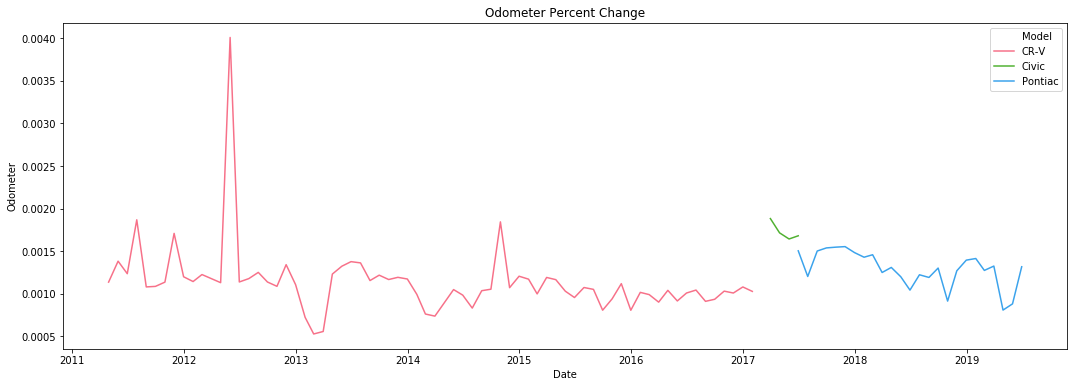

In [48]:
fig, ax = plt.subplots(ncols=1, figsize=(18, 6))

ax = sns.lineplot(x='Date', y='Odometer', hue='Model', palette='husl', 
             data=df_pct_change.reset_index(), ax=ax)
ax.set_title('Odometer Percent Change')

plt.show()

#### 2.2.8 Feature: Latitude & Longitude

In [50]:
# import geopandas
# import contextily

### 2.3 Multi-variate EDA

In [51]:
df.head()

,Trip_Distance,Fill_Amount,Price_per_Unit,Total_Price,Partial_Fill,MPG,Latitude,Longitude,Model,Odometer,Year,Month,MPG_scaled
Date,,,,,,,,,,,,,
2011-02-22 00:00:00,261.786408,11.3540,3.8788,44.04,0,24.692765,NaN,NaN,CR-V,199220.0,2011,2,0.225734
2011-04-03 00:00:00,234.000000,12.9022,4.4690,57.66,0,18.136400,NaN,NaN,CR-V,199454.0,2011,4,0.092626
2011-04-19 00:00:00,219.000000,12.5520,4.6990,58.98,0,17.447400,NaN,NaN,CR-V,199673.0,2011,4,0.078638
2011-05-03 00:00:00,276.000000,12.2310,4.7790,58.45,0,22.565600,NaN,NaN,CR-V,199949.0,2011,5,0.182548
2011-06-14 19:02:00,247.000000,13.2280,4.8790,64.54,0,18.672500,NaN,NaN,CR-V,200196.0,2011,6,0.103510


#### Relationship between Trip_Distance and MPG

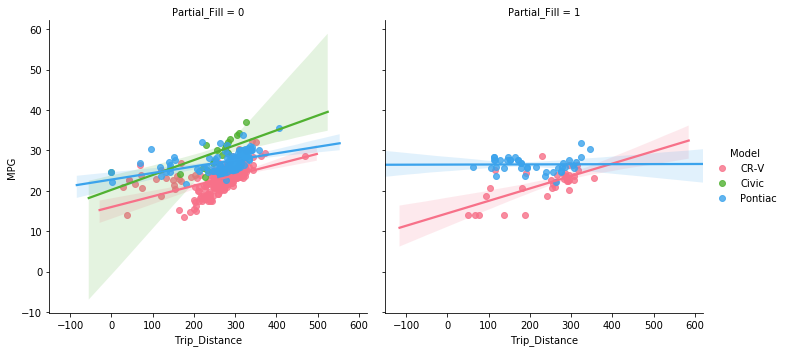

In [52]:
# Trip_Distance and MPG with outliers removed
sns.lmplot(x='Trip_Distance', y='MPG', hue='Model', 
           data=df[(df.Trip_Distance < 600) & (df.MPG < 40)], col='Partial_Fill', palette='husl')
plt.show()

It appears that the longer the distance between fillups the higher the MPG.

#### Relationship between Fill_Amount and MPG

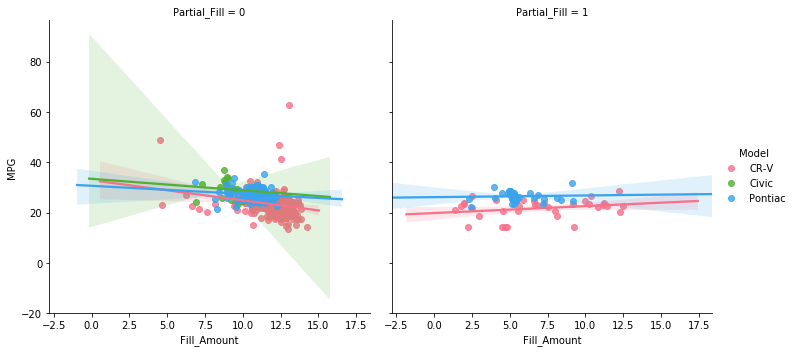

In [53]:
# Fill_Amount and MPG
sns.lmplot(x='Fill_Amount', y='MPG', data=df, col='Partial_Fill', hue='Model', palette='husl')
plt.show()

#### Relationship between Total_Price and MPG

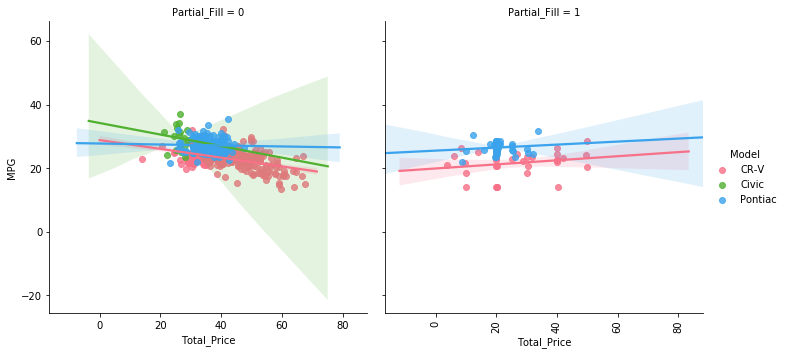

In [54]:
# Fill_Amount and MPG
sns.lmplot(x='Total_Price', y='MPG', data=df[(df.Price_per_Unit < 5) & (df.MPG < 40)],
           hue='Model', palette='husl', col='Partial_Fill')
plt.xticks(rotation=90)
plt.show()

#### Relationship between Price_per_Unit and MPG

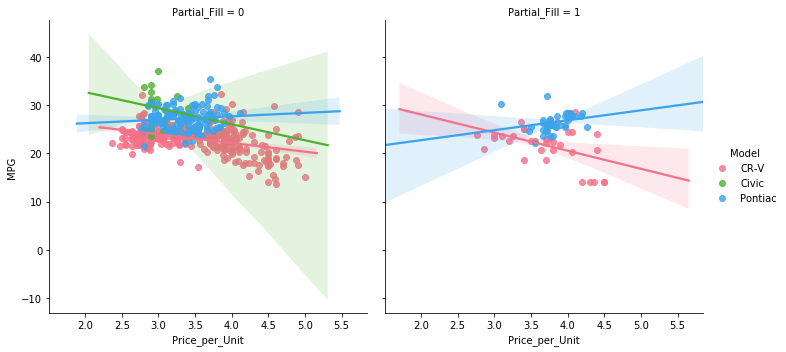

In [55]:
# Fill_Amount and MPG with outlier over $5 removed
lm = sns.lmplot(x='Price_per_Unit', y='MPG', data=df[(df.Price_per_Unit < 5) & (df.MPG < 40)], palette='husl', 
                hue='Model', col='Partial_Fill')
plt.show()

#### MPG, Trip_Distance & Fill_Amount

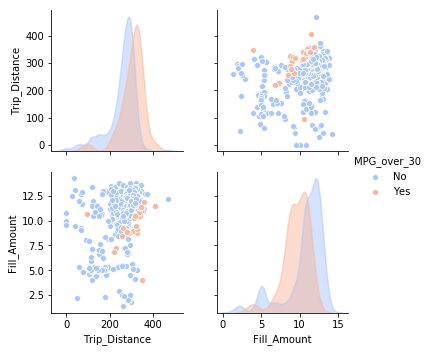

In [56]:
# Add a feature: Max_MPG of MPG values over 30
df['MPG_over_30'] = df.MPG >= 30
df['MPG_over_30'] = df.MPG_over_30.map({False:'No', True:'Yes'})

# drop MPG outliers
df_drop_outlier = df[df.MPG < 40]

# Plot
sns.pairplot(df_drop_outlier, vars=['Trip_Distance', 'Fill_Amount'], 
             kind='scatter', palette='coolwarm', hue='MPG_over_30', diag_kws={'alpha':0.5}, diag_kind="kde")
plt.show()

#### Partial_Fill and Trip_Distance, Fill_Amount, Price_per_Unit, Total_Price, MPG

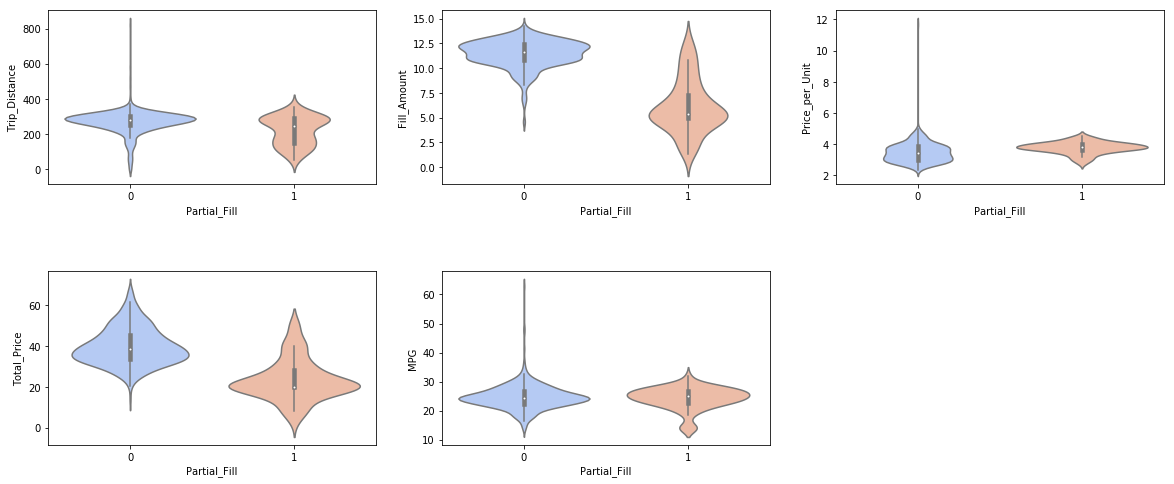

In [57]:
columns = ['Trip_Distance', 'Fill_Amount', 'Price_per_Unit', 'Total_Price', 'MPG']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

for i, column in enumerate(columns[:3]):
    sns.violinplot(x='Partial_Fill', y=column, data=df, ax=axes[0,i], palette='coolwarm')

for i, column in enumerate(columns[3:]):
    sns.violinplot(x='Partial_Fill', y=column, data=df, ax=axes[1,i], palette='coolwarm')
    
fig.delaxes(axes[1][2])    
fig.subplots_adjust(hspace=0.5)
plt.show()

### 2.5 Geographical Analysis

In [58]:
df.head()

,Trip_Distance,Fill_Amount,Price_per_Unit,Total_Price,Partial_Fill,MPG,Latitude,Longitude,Model,Odometer,Year,Month,MPG_scaled,MPG_over_30
Date,,,,,,,,,,,,,,
2011-02-22 00:00:00,261.786408,11.3540,3.8788,44.04,0,24.692765,NaN,NaN,CR-V,199220.0,2011,2,0.225734,No
2011-04-03 00:00:00,234.000000,12.9022,4.4690,57.66,0,18.136400,NaN,NaN,CR-V,199454.0,2011,4,0.092626,No
2011-04-19 00:00:00,219.000000,12.5520,4.6990,58.98,0,17.447400,NaN,NaN,CR-V,199673.0,2011,4,0.078638,No
2011-05-03 00:00:00,276.000000,12.2310,4.7790,58.45,0,22.565600,NaN,NaN,CR-V,199949.0,2011,5,0.182548,No
2011-06-14 19:02:00,247.000000,13.2280,4.8790,64.54,0,18.672500,NaN,NaN,CR-V,200196.0,2011,6,0.103510,No


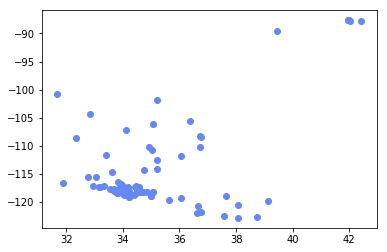

In [66]:
ax = plt.scatter(df.Latitude, df.Longitude)